In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [8]:
data = pd.read_csv("/content/spam_ham_dataset.csv", encoding='latin-1')
#the DataFrame likely has columns named 'Unnamed: 0', 'label', 'text', and 'Unnamed: 4'.
#adjust column selection accordingly.
data = data[['label', 'text']]
#rename the columns to 'label' and 'message'.
data.columns = ['label', 'message']
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    data['message'], data['label'], test_size=0.2, random_state=42)

#feature extraction
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
#train model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
#predictions
y_pred = model.predict(X_test_tfidf)

#evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       742
           1       0.89      0.93      0.91       293

    accuracy                           0.95      1035
   macro avg       0.93      0.94      0.93      1035
weighted avg       0.95      0.95      0.95      1035



<ipython-input-10-0648368dafb8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['label'], palette='coolwarm')


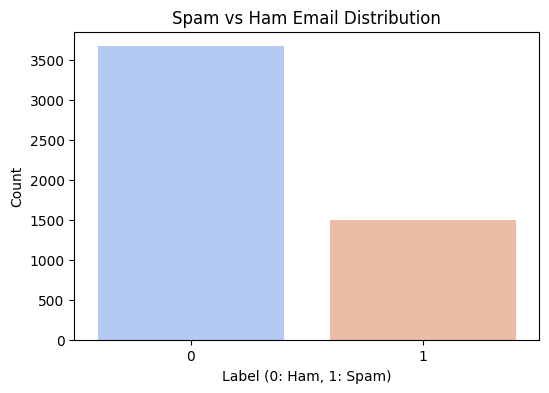

In [10]:
#data visualization
plt.figure(figsize=(6,4))
sns.countplot(x=data['label'], palette='coolwarm')
plt.title("Spam vs Ham Email Distribution")
plt.xlabel("Label (0: Ham, 1: Spam)")
plt.ylabel("Count")
plt.show()

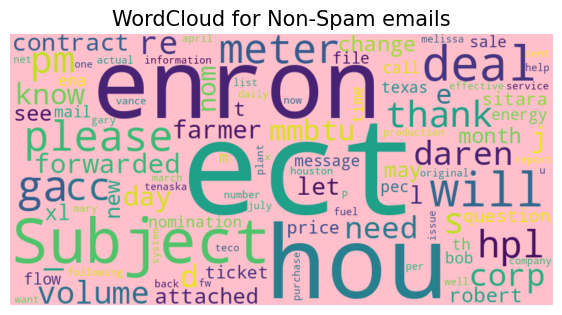

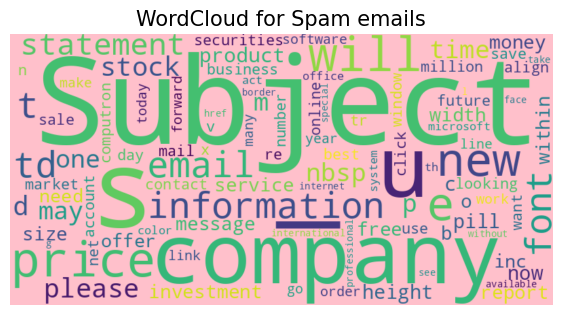

In [11]:
!pip install wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud


def plot_word_cloud(data, typ):
	#access the 'message' column instead of 'text'
	email_corpus = " ".join(data['message'])

	plt.figure(figsize=(7, 7))

	wc = WordCloud(background_color='pink',
				max_words=100,
				width=800,
				height=400,
				collocations=False).generate(email_corpus)

	plt.imshow(wc, interpolation='bilinear')
	plt.title(f'WordCloud for {typ} emails', fontsize=15)
	plt.axis('off')
	plt.show()
plot_word_cloud(data[data['label'] == 0], typ='Non-Spam')
plot_word_cloud(data[data['label'] == 1], typ='Spam')

In [29]:

def classify_email():
    user_input = input("Enter an email message: ")
    user_input_tfidf = vectorizer.transform([user_input])
    prediction = model.predict(user_input_tfidf)[0]
    print("Spam" if prediction == 1 else "Not Spam")
classify_email()

Enter an email message: information
Not Spam
